In [26]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Load

In [27]:
df = pd.read_csv('../data/UCI_Credit_Card.csv')

In [ ]:
df['PAY_0'].unique()

In [ ]:
pd.crosstab(df['default.payment.next.month'] , df['PAY_0']).plot(kind = 'bar', stacked=True)

## Data Quality : Missing values Outliers duplicate data   

## check for unique 

In [78]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [37]:
df.apply(lambda x: (x.nunique(), len(x)))

ID                            (30000, 30000)
LIMIT_BAL                        (81, 30000)
SEX                               (2, 30000)
EDUCATION                         (7, 30000)
MARRIAGE                          (4, 30000)
AGE                              (56, 30000)
PAY_0                            (11, 30000)
PAY_2                            (11, 30000)
PAY_3                            (11, 30000)
PAY_4                            (11, 30000)
PAY_5                            (10, 30000)
PAY_6                            (10, 30000)
BILL_AMT1                     (22723, 30000)
BILL_AMT2                     (22346, 30000)
BILL_AMT3                     (22026, 30000)
BILL_AMT4                     (21548, 30000)
BILL_AMT5                     (21010, 30000)
BILL_AMT6                     (20604, 30000)
PAY_AMT1                       (7943, 30000)
PAY_AMT2                       (7899, 30000)
PAY_AMT3                       (7518, 30000)
PAY_AMT4                       (6937, 30000)
PAY_AMT5  

{'whiskers': [<matplotlib.lines.Line2D at 0x1a57c17ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a577bae90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a57c17e90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a577c38d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a577c3dd0>],
 'means': []}

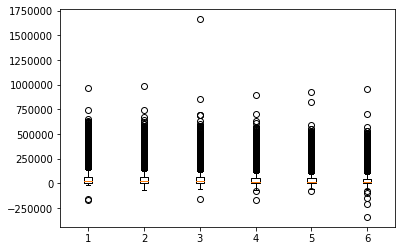

In [126]:
import seaborn as sns
fig = plt.figure()
ax = plt.subplot(111)

 #TODO figure out how to do plotting in a loop 

ax.boxplot(df['BILL_AMT1'] , positions = [1])
ax.boxplot(df['BILL_AMT2'], positions = [2])
ax.boxplot(df['BILL_AMT3'], positions = [3])
ax.boxplot(df['BILL_AMT4'], positions = [4])
ax.boxplot(df['BILL_AMT5'], positions = [5])
ax.boxplot(df['BILL_AMT6'], positions = [6])



as we can see from above box plots there are certainly some values that are excessively high for each type of bill amount considering their mean and median values.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a4d536ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a4d538910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a4d50d590>],
 'medians': [<matplotlib.lines.Line2D at 0x1a4d536f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a4d619850>],
 'means': []}

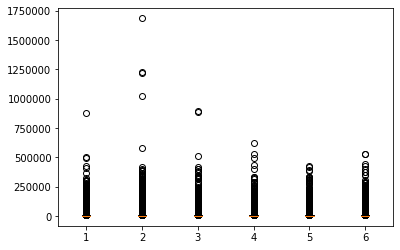

In [50]:
fig = plt.figure()
ax = plt.subplot(111)

ax.boxplot(df['PAY_AMT1'] , positions = [1])
ax.boxplot(df['PAY_AMT2'], positions = [2])
ax.boxplot(df['PAY_AMT3'], positions = [3])
ax.boxplot(df['PAY_AMT4'], positions = [4])
ax.boxplot(df['PAY_AMT5'], positions = [5])
ax.boxplot(df['PAY_AMT6'], positions = [6])

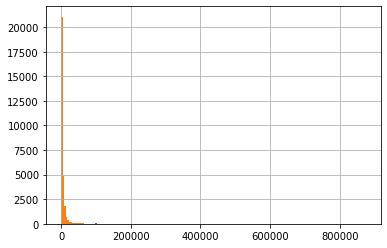

In [77]:
# filter the amout greater than 25000 to find median values visible since outliers will not affect 
# the median values

fig = plt.figure()
ax = plt.subplot(111)

len(df[df['PAY_AMT1']>40000]['PAY_AMT1'])

df[df['PAY_AMT1']>40000]['PAY_AMT1'].hist(bins=200)

df['PAY_AMT1'].hist(bins=200)




#ax.boxplot(df[df['PAY_AMT1']<8000]['PAY_AMT1'] , positions = [1])
#ax.boxplot(df[df['PAY_AMT2']>25000]['PAY_AMT2'], positions = [2])


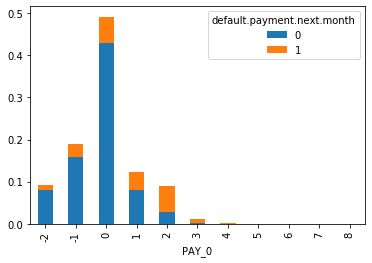

In [79]:
pd.crosstab(df['PAY_0'],df['default.payment.next.month'] , normalize =True).plot(kind = 'bar', stacked=True)

In [113]:
df_contin = df[['BILL_AMT1' , 'BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5','BILL_AMT6',
                'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
#pd.plotting.scatter_matrix(df_contin)
#plt.show()

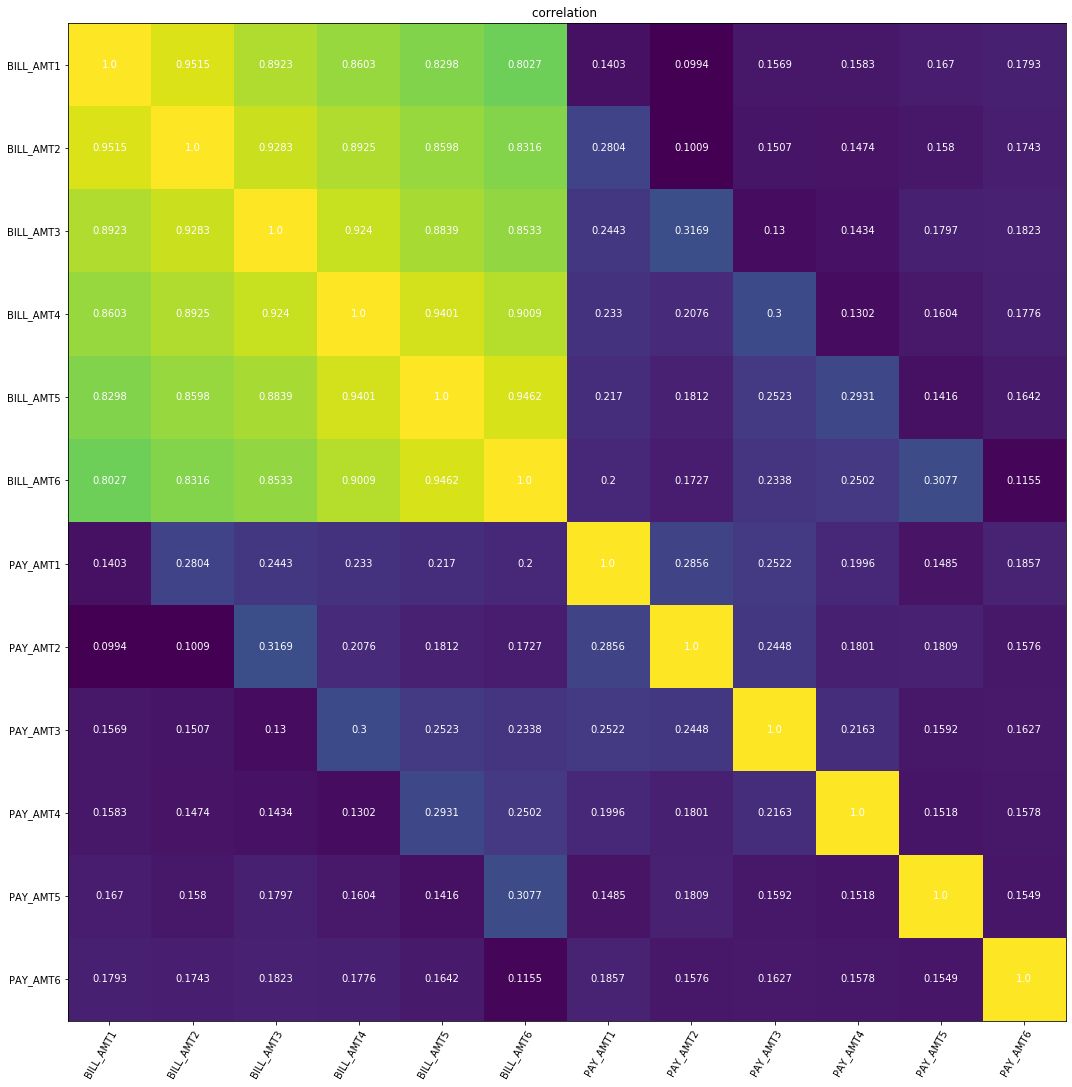

In [125]:
import numpy as np
corr= df_contin.corr()
corr= corr.round(decimals=4 )

fig, ax = plt.subplots(figsize = (15,20))
im = ax.imshow(corr)

# We want to show all ticks...
ax.set_xticks(np.arange(len(corr.index)))
ax.set_yticks(np.arange(len(corr.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(corr.index)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, corr[corr.index[i]][corr.columns[j]],
                       ha="center", va="center", color="w")

ax.set_title("correlation ")
fig.tight_layout()
plt.show()





In [123]:
corr

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
BILL_AMT1,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
BILL_AMT2,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256
BILL_AMT3,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326
BILL_AMT4,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637
BILL_AMT5,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184
BILL_AMT6,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494
PAY_AMT1,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
PAY_AMT2,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634
PAY_AMT3,0.156887,0.150718,0.130011,0.300023,0.252305,0.233770,0.252191,0.244770,1.000000,0.216325,0.159214,0.162740
PAY_AMT4,0.158303,0.147398,0.143405,0.130191,0.293118,0.250237,0.199558,0.180107,0.216325,1.000000,0.151830,0.157834


There seems to be a positive  correlation between bill amounts but there is little correlation between bill amount and payment amount and between payment amounts.
as payments time increases  the correlation decreases.

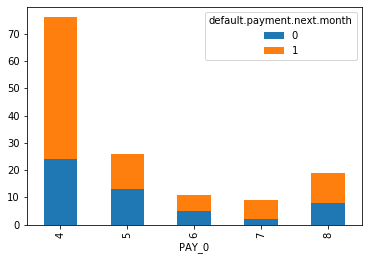

In [96]:
longer_default = df[df['PAY_0']>3]
pd.crosstab(longer_default['PAY_0'],longer_default['default.payment.next.month'] ).plot(kind = 'bar', stacked=True)

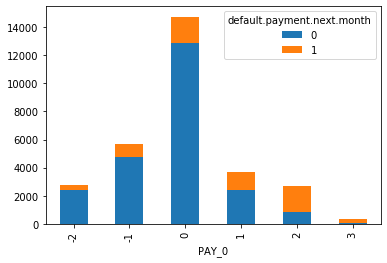

In [97]:
shorter_default = df[df['PAY_0']<=3]
pd.crosstab(shorter_default['PAY_0'],shorter_default['default.payment.next.month'] ).plot(kind = 'bar', stacked=True)

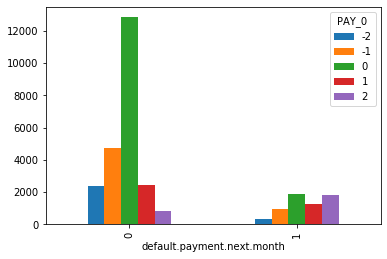

In [134]:
df_low_pay = df[df['PAY_0']<3]
pd.crosstab(df_low_pay['default.payment.next.month'] , df_low_pay['PAY_0']).plot(kind = 'bar')

df_high_pay = df[df['PAY_0']>=3]
pd.crosstab(df_high_pay['default.payment.next.month'] , df_high_pay['PAY_0']).plot(kind = 'bar')

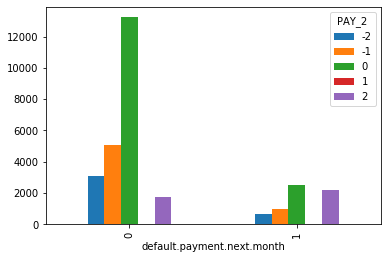

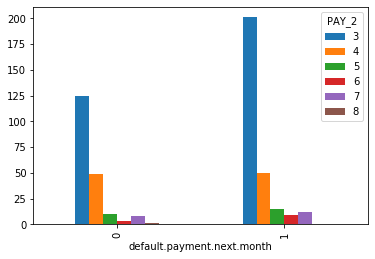

In [139]:
df_low_pay = df[df['PAY_2']<3]
pd.crosstab(df_low_pay['default.payment.next.month'] , df_low_pay['PAY_2']).plot(kind = 'bar')

df_low_pay = df[df['PAY_2']>=3]
pd.crosstab(df_low_pay['default.payment.next.month'] , df_low_pay['PAY_2']).plot(kind = 'bar')

from above two box plots it looks like the there are more people who defaulted for PAY_0 values greater than or equal 3. that is  if payment delay were more than or equal to 3 months then more default than for those when delay is less than 3  months. 

In [131]:
pd.crosstab(df_high_pay['default.payment.next.month'] , df_high_pay['PAY_0'])

PAY_0,5,6,7,8
default.payment.next.month,,,,
0,13,5,2,8
1,13,6,7,11


In [98]:
df['default'] = df['default.payment.next.month']

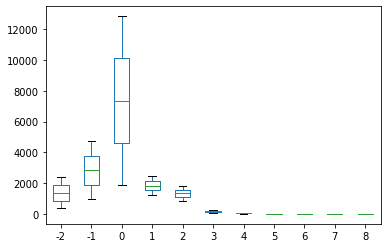

In [99]:
pd.crosstab(df['default.payment.next.month'] , df['PAY_0']).plot(kind = 'box')

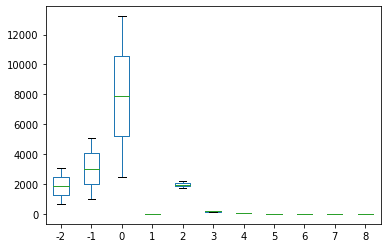

In [101]:
pd.crosstab(df['default.payment.next.month'] , df['PAY_2']).plot(kind = 'box')

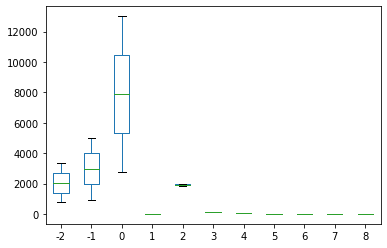

In [103]:
pd.crosstab(df['default'] , df['PAY_3']).plot(kind = 'box')

In [105]:
edu_default = pd.crosstab(df.default , df.EDUCATION) 

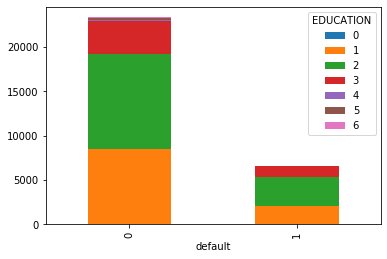

In [106]:
edu_default.plot(kind = 'bar', stacked = True)

In [107]:
sex_edu = pd.crosstab(df.default , df.SEX) 

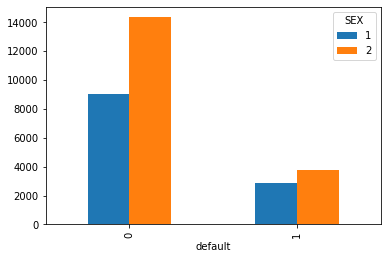

In [108]:
sex_edu.plot(kind= 'bar')

In [ ]:
age_def = pd.crosstab(df['AGE'] , df['default'])

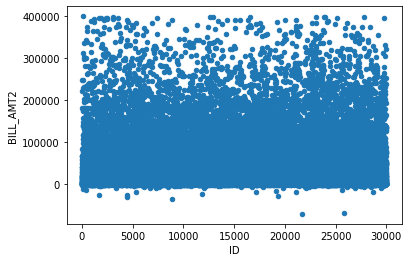

In [109]:
#age_def.plot()
#df[df['default']==0].LIMIT_BAL.hist()
#df.PAY_2.nunique()
#df[df['default']==0].LIMIT_BAL.hist()
#df.BILL_AMT2.hist()
#df.PAY_AMT3.hist()
#df.plot.scatter('ID' , 'BILL_AMT2' )
df[df['BILL_AMT2'] < 400000].plot.scatter('ID' , 'BILL_AMT2' )

In [ ]:
#df['PAY_AMT4'].plot(kind = 'box')
#df[df['BILL_AMT2'] < 400000][['default', 'BILL_AMT2']].plot( kind = 'box')